In [1]:
# Imports
%load_ext autoreload
%autoreload 2 
# !apt-get install -y xvfb
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
import networkx as nx

### QC path identification

In [2]:
# load original df, group into bps with T/ F if its a QCd path. 
# QC'd paths are up to LB1-10, RB1-10, 2 gens down from LB1, LB10, RB1. RB4, RB10
orig_df = df = pd.read_csv(os.path.abspath("/home/sneha/airway_exploration/e5_cleaned_v1.csv"))


In [3]:
qc_names = [x for x in orig_df.anatomicalname.unique() if ('unnamed' not in x.lower()) & (x != '-')]
orig_df['QC'] = False

print(qc_names)
orig_df.loc[orig_df.anatomicalname.isin(qc_names), 'QC'] = True
display(orig_df)

def _travel_two(df, extend_names=['LB1', 'LB10', 'RB1', 'RB4', 'RB10'], extend_gen=2):
    print('start',df.QC.sum())
    startbpids = df.loc[df.anatomicalname.isin(extend_names)]['endbpid'].to_list()
    print(f"Extending {extend_gen} generations from {extend_names} which have segment ids = {startbpids}")
    qc_children = startbpids
    for i in range(extend_gen):
        new_children = df.loc[df.startbpid.isin(qc_children)]['endbpid'].to_list()
        qc_children+=new_children
#         print('Adding a generation', qc_children)
    print('end', len(qc_children))
    return qc_children
    
          
          
for i, participant_df in tqdm(orig_df.groupby('idno')):
    print(participant_df.idno.unique())
    qc_children = _travel_two(participant_df,extend_names=['LB1', 'LB10', 'RB1', 'RB4', 'RB10'], extend_gen=2)
    orig_df.loc[(orig_df.idno==int(participant_df.idno.unique())) & (orig_df.endbpid.isin(qc_children)), 'QC']= True

display(orig_df)


['Trachea', 'LMB', 'RMB', 'BronInt', 'RUL', 'LLB6', 'LUL', 'RB4+5', 'RB1', 'LB6', 'LB4+5', 'RLL7', 'RB6', 'RB4', 'RB5', 'RB2', 'RB3', 'LLB', 'LB3', 'LB1+2', 'LB5', 'LB4', 'RLL', 'RB7', 'LB8', 'LB2', 'LB1', 'RB10', 'LB10', 'LB9', 'RB8', 'RB9', 'RB2a']


,idno,anatomicalname,centerlinelength,avginnerarea,lobe,sublobe,endbpid,startbpid,angle,dircosx,dircosy,dircosz,weibel_generation,QC
0,3010007,Trachea,104.96200,351.51300,0.0,0.0,1.0,-1.0,NaN,-0.024446,0.229788,0.972934,0,True
1,3010007,LMB,51.01420,148.68100,0.0,0.0,3.0,1.0,140.0360,0.608512,0.045926,0.792214,1,True
2,3010007,RMB,25.44420,215.56900,0.0,0.0,2.0,1.0,134.8050,-0.694225,-0.047878,0.718164,1,True
3,3010007,BronInt,29.83190,111.98300,0.0,0.0,4.0,2.0,160.3120,-0.417837,0.018167,0.908341,2,True
4,3010007,RUL,16.64940,75.69660,3.0,0.0,5.0,2.0,98.5825,-0.813123,-0.038720,-0.580802,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926836,8024995,-,6.14524,6.48287,5.0,16.0,334.0,314.0,165.1320,0.164399,0.000000,0.986394,12,False
926837,8024995,-,15.64100,6.87548,5.0,19.0,335.0,317.0,156.6690,0.074125,0.667124,0.741249,12,False
926838,8024995,-,7.54570,6.98296,5.0,19.0,336.0,317.0,161.6230,0.205076,0.205076,0.957020,12,False
926839,8024995,-,3.32710,5.57702,2.0,9.0,337.0,327.0,143.1220,-0.742781,-0.371391,0.557086,12,False


  0%|          | 0/2911 [00:00<?, ?it/s]

[3010007]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [10.0, 19.0, 54.0, 61.0, 91.0]
end 43
[3010058]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [30.0, 37.0, 45.0, 49.0, 174.0]
end 33
[3010082]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 21.0, 50.0, 57.0, 160.0]
end 45
[3010090]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 20.0, 75.0, 82.0, 153.0]
end 41
[3010112]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 39.0, 168.0, 205.0]
end 36
[3010139]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 42.0, 52.0, 106.0, 353.0]
end 45
[3010155]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment 

[3011518]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [54.0, 62.0, 108.0, 149.0, 293.0]
end 43
[3011569]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 59.0, 68.0, 268.0]
end 28
[3011585]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [43.0, 52.0, 56.0, 222.0]
end 36
[3011593]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 30.0, 48.0, 87.0, 90.0]
end 43
[3011607]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 29.0, 59.0, 117.0]
end 26
[3011615]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 53.0, 107.0, 149.0]
end 36
[3011623]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [12.0, 30.0

[3012689]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 35.0, 38.0, 54.0, 284.0]
end 37
[3012697]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 24.0, 107.0, 108.0, 243.0]
end 37
[3012727]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [31.0, 33.0, 49.0, 379.0]
end 20
[3012735]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [31.0, 58.0, 73.0, 140.0]
end 22
[3012786]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 45.0, 49.0, 104.0, 120.0]
end 37
[3012816]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [102.0, 103.0, 115.0, 129.0, 352.0]
end 45
[3012824]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment 

[3014274]
start 24
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [27.0, 52.0, 106.0]
end 25
[3014304]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [28.0, 39.0, 46.0, 58.0, 144.0]
end 37
[3014312]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [92.0, 72.0, 73.0, 83.0, 316.0]
end 37
[3014428]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 46.0, 57.0, 91.0, 189.0]
end 45
[3014436]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 36.0, 60.0, 189.0]
end 34
[3014444]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 31.0, 34.0, 43.0, 143.0]
end 41
[3014452]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 

[3015564]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 20.0, 48.0, 166.0, 222.0]
end 43
[3015572]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [38.0, 43.0, 49.0, 56.0, 215.0]
end 45
[3015599]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 25.0, 52.0, 58.0, 88.0]
end 41
[3015629]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 22.0, 63.0, 147.0, 195.0]
end 45
[3015653]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 29.0, 32.0, 91.0, 169.0]
end 45
[3015661]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [76.0, 82.0, 110.0, 210.0]
end 36
[3015718]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment

[3016978]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 32.0, 54.0, 77.0]
end 36
[3016986]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 33.0, 127.0, 138.0, 180.0]
end 45
[3017028]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 21.0, 58.0, 149.0, 188.0]
end 45
[3017036]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 22.0, 63.0, 189.0, 341.0]
end 43
[3017052]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 45.0, 56.0, 57.0, 358.0]
end 43
[3017060]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [52.0, 56.0, 86.0, 96.0, 211.0]
end 41
[3017079]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segmen

[3018415]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 42.0, 85.0, 99.0, 208.0]
end 45
[3018423]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 27.0, 100.0, 248.0]
end 28
[3018431]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [13.0, 18.0, 50.0, 122.0, 158.0]
end 45
[3018440]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [8.0, 20.0, 49.0, 86.0, 117.0]
end 37
[3018466]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [13.0, 22.0, 30.0, 34.0, 278.0]
end 45
[3018482]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 57.0, 112.0, 215.0]
end 34
[3018512]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids =

[3019691]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [117.0, 129.0, 134.0, 269.0, 356.0]
end 45
[3019705]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 38.0, 50.0, 58.0, 76.0]
end 45
[3019713]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 69.0, 101.0, 182.0]
end 30
[3019748]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 23.0, 30.0, 50.0, 113.0]
end 45
[3019756]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [33.0, 44.0, 69.0, 89.0, 179.0]
end 33
[3019799]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 190.0, 280.0]
end 23
[3019810]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [2

[3022064]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 22.0, 107.0, 245.0]
end 36
[3022145]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [34.0, 70.0, 81.0, 196.0]
end 34
[3022161]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 36.0, 46.0, 164.0, 188.0]
end 43
[3022170]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 61.0, 77.0, 334.0]
end 36
[3022188]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 21.0, 98.0, 201.0, 207.0]
end 43
[3022218]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [91.0, 103.0, 132.0, 207.0]
end 34
[3022226]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 1

[4010388]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 21.0, 55.0, 60.0, 144.0]
end 37
[4010418]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [12.0, 30.0, 50.0, 118.0, 214.0]
end 35
[4010442]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [70.0, 94.0, 113.0, 135.0]
end 36
[4010469]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [28.0, 30.0, 38.0, 290.0]
end 36
[4010477]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 31.0, 32.0, 84.0, 244.0]
end 45
[4010493]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 26.0, 30.0, 35.0, 114.0]
end 43
[4010515]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids =

end 45
[4011767]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0, 30.0, 37.0, 115.0, 251.0]
end 45
[4011775]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 26.0, 36.0, 126.0, 133.0]
end 45
[4011783]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 25.0, 48.0, 99.0, 261.0]
end 37
[4011791]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 49.0, 53.0, 95.0, 215.0]
end 43
[4011813]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 25.0, 118.0, 197.0]
end 34
[4011830]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [45.0, 53.0, 61.0, 146.0]
end 32
[4011856]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segme

[4013166]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 56.0, 45.0, 153.0]
end 36
[4013174]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 23.0, 31.0, 48.0, 223.0]
end 45
[4013190]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [56.0, 61.0, 174.0, 240.0]
end 34
[4013204]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [10.0, 17.0, 83.0, 151.0, 163.0]
end 43
[4013212]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 36.0, 50.0, 77.0, 174.0]
end 43
[4013220]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [122.0, 103.0, 110.0, 118.0, 421.0]
end 41
[4013247]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment i

[4014715]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 92.0, 114.0, 166.0]
end 32
[4014723]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0, 32.0, 85.0, 109.0, 112.0]
end 41
[4014731]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 30.0, 73.0, 203.0]
end 36
[4014758]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 22.0, 47.0, 53.0, 157.0]
end 43
[4014766]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [34.0, 38.0, 71.0, 73.0, 165.0]
end 37
[4014774]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 23.0, 60.0, 100.0, 206.0]
end 43
[4014782]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids 

[4016050]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 39.0, 50.0, 54.0, 146.0]
end 41
[4016084]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [58.0, 62.0, 68.0, 71.0, 117.0]
end 27
[4016092]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [28.0, 34.0, 83.0, 86.0, 239.0]
end 45
[4016122]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [30.0, 40.0, 45.0, 78.0, 174.0]
end 37
[4016157]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 27.0, 65.0, 150.0]
end 34
[4016165]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 35.0, 46.0, 66.0]
end 34
[4016173]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [1

[4017242]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 38.0, 47.0, 50.0, 113.0]
end 45
[4017269]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [8.0, 31.0, 42.0, 48.0, 221.0]
end 45
[4017285]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 28.0, 91.0, 192.0]
end 36
[4017307]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [108.0, 132.0, 196.0, 206.0]
end 30
[4017331]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [54.0, 25.0, 30.0, 81.0, 156.0]
end 37
[4017374]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 26.0, 70.0, 120.0, 127.0]
end 43
[4017439]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids 

[4018915]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 22.0, 52.0, 154.0]
end 36
[4018923]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [33.0, 54.0, 77.0, 269.0]
end 34
[4018931]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 25.0, 53.0, 124.0, 128.0]
end 37
[4018940]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 21.0, 51.0, 59.0, 135.0]
end 43
[4018966]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 28.0, 81.0, 98.0, 125.0]
end 45
[4018974]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [158.0, 178.0, 190.0, 201.0, 291.0]
end 43
[4018990]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment id

[4021061]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 23.0, 50.0, 104.0, 187.0]
end 43
[4021088]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [42.0, 28.0, 37.0, 45.0, 214.0]
end 45
[4021096]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [68.0, 72.0, 108.0, 135.0, 186.0]
end 41
[4021100]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [40.0, 42.0, 54.0, 307.0]
end 36
[4021126]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [23.0, 46.0, 56.0, 70.0]
end 36
[4021142]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 22.0, 109.0, 121.0]
end 28
[4021150]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.

[4022564]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 63.0, 67.0, 152.0]
end 34
[4022602]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 54.0, 60.0, 66.0, 234.0]
end 43
[4022610]
start 7
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = []
end 0
[4022645]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [57.0, 47.0, 82.0, 91.0, 293.0]
end 45
[4022670]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [28.0, 46.0, 51.0, 65.0, 344.0]
end 45
[4022700]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 63.0, 71.0, 164.0]
end 36
[4022718]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 31.0, 43.0, 111.0, 179.0]

[4810880]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [45.0, 85.0, 187.0, 284.0]
end 32
[4810929]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 45.0, 52.0, 75.0, 215.0]
end 45
[4810937]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 23.0, 56.0, 202.0, 237.0]
end 41
[4810945]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [6.0, 37.0, 46.0, 61.0, 308.0]
end 43
[4810970]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 34.0, 81.0, 179.0]
end 36
[4810988]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 102.0, 150.0, 217.0]
end 36
[4810996]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.

[5011531]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [4.0, 45.0, 54.0, 105.0, 304.0]
end 43
[5011558]
start 25
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [85.0, 98.0, 181.0]
end 25
[5011582]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [38.0, 43.0, 57.0, 169.0]
end 34
[5011639]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 20.0, 65.0, 81.0, 92.0]
end 43
[5011647]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 53.0, 59.0, 106.0]
end 30
[5011663]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 47.0, 67.0, 83.0, 216.0]
end 45
[5011728]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [8.0, 22.0, 53

[5013429]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 22.0, 53.0, 61.0, 325.0]
end 43
[5013453]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 22.0, 48.0, 56.0, 171.0]
end 43
[5013461]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 82.0, 115.0, 130.0]
end 36
[5013470]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [8.0, 26.0, 28.0, 74.0, 251.0]
end 43
[5013518]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [6.0, 26.0, 108.0, 362.0]
end 36
[5013534]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 28.0, 37.0, 57.0, 174.0]
end 43
[5013607]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [

[5015405]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 64.0, 83.0, 112.0, 122.0]
end 43
[5015413]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 38.0, 51.0, 103.0, 196.0]
end 45
[5015421]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 31.0, 79.0, 134.0]
end 24
[5015553]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 21.0, 99.0, 114.0]
end 32
[5015634]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [31.0, 39.0, 46.0, 58.0, 63.0]
end 17
[5015677]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [8.0, 44.0, 69.0, 75.0, 296.0]
end 39
[5015693]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [

[5017483]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [60.0, 68.0, 96.0, 109.0, 179.0]
end 37
[5017530]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 49.0, 56.0, 257.0]
end 32
[5017572]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 35.0, 42.0, 48.0, 108.0]
end 45
[5017599]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 23.0, 56.0, 63.0, 86.0]
end 35
[5017637]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 19.0, 85.0, 114.0, 120.0]
end 43
[5017653]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 37.0, 47.0, 96.0, 270.0]
end 45
[5017840]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment 

[5019451]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [28.0, 36.0, 68.0, 85.0, 197.0]
end 43
[5019486]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 36.0, 74.0, 174.0, 179.0]
end 43
[5019516]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [53.0, 62.0, 132.0]
end 27
[5019524]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 23.0, 59.0, 105.0, 237.0]
end 45
[5019540]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 33.0, 45.0, 64.0, 104.0]
end 29
[5019575]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 20.0, 88.0, 114.0, 150.0]
end 45
[5019605]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids 

[5022517]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 21.0, 53.0, 107.0, 188.0]
end 43
[5022525]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 49.0, 118.0, 160.0]
end 34
[5022622]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [8.0, 23.0, 50.0, 84.0, 157.0]
end 41
[5022657]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 31.0, 68.0, 75.0, 294.0]
end 41
[5022673]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [45.0, 53.0, 77.0, 148.0]
end 32
[5022681]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [43.0, 50.0, 53.0, 59.0, 106.0]
end 35
[5022690]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = 

[6011241]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 21.0, 68.0, 77.0, 82.0]
end 33
[6011314]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [46.0, 34.0, 37.0, 44.0, 119.0]
end 43
[6011390]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 55.0, 97.0, 131.0]
end 36
[6011438]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 16.0, 73.0, 94.0, 100.0]
end 37
[6011497]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0, 39.0, 79.0, 367.0]
end 36
[6011527]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [9.0, 42.0, 56.0, 176.0]
end 28
[6011535]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 20

[6012868]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [27.0, 32.0, 109.0]
end 25
[6012884]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 25.0, 36.0, 137.0, 223.0]
end 45
[6012892]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 20.0, 49.0, 61.0, 115.0]
end 43
[6012930]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 38.0, 50.0, 55.0, 209.0]
end 43
[6013007]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [35.0, 67.0, 93.0, 140.0]
end 36
[6013015]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [33.0, 41.0, 84.0, 293.0]
end 36
[6013023]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 41.0,

[6014836]
start 25
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 30.0, 34.0, 174.0]
end 34
[6014879]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 36.0, 43.0, 55.0, 310.0]
end 45
[6014950]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 27.0, 69.0, 106.0]
end 36
[6014992]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 48.0, 52.0, 222.0]
end 36
[6015018]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 52.0, 92.0, 99.0]
end 32
[6015034]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 36.0, 46.0, 106.0, 174.0]
end 45
[6015069]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 45.0, 

[6016839]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [11.0, 24.0, 45.0, 57.0, 61.0]
end 43
[6016855]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 22.0, 52.0, 116.0, 211.0]
end 41
[6016863]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 42.0, 48.0, 100.0, 154.0]
end 43
[6016898]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 27.0, 40.0, 67.0]
end 34
[6016928]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 40.0, 51.0, 58.0, 337.0]
end 43
[6016944]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [4.0, 33.0, 45.0, 69.0, 113.0]
end 43
[6016979]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment id

[6018874]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [31.0, 36.0, 53.0, 56.0, 162.0]
end 39
[6018939]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 44.0, 68.0, 89.0]
end 24
[6019005]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [9.0, 22.0, 51.0, 70.0, 107.0]
end 31
[6019021]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 46.0, 48.0, 74.0]
end 18
[6019056]
start 21
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [117.0, 137.0]
end 18
[6019072]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [11.0, 48.0, 66.0, 111.0, 138.0]
end 39
[6019080]
start 24
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 51.0, 60.0, 1

[6021832]
start 25
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 62.0, 205.0]
end 27
[6021875]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [23.0, 87.0, 159.0, 196.0]
end 34
[6021891]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [30.0, 33.0, 39.0, 75.0, 147.0]
end 41
[6021930]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 22.0, 55.0, 56.0, 107.0]
end 33
[6022014]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 49.0, 88.0, 121.0, 150.0]
end 43
[6022030]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [72.0, 79.0, 107.0, 123.0, 144.0]
end 29
[6022049]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [12

[7010338]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [33.0, 38.0, 44.0, 50.0, 233.0]
end 37
[7010354]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 41.0, 65.0, 98.0, 287.0]
end 45
[7010400]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 23.0, 52.0, 67.0, 90.0]
end 37
[7010419]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [13.0, 33.0, 37.0, 126.0, 189.0]
end 45
[7010443]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0, 27.0, 35.0, 48.0, 288.0]
end 45
[7010478]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 22.0, 30.0, 55.0, 151.0]
end 45
[7010494]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have seg

[7011768]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [27.0, 36.0, 47.0, 56.0, 306.0]
end 43
[7011776]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 28.0, 37.0, 57.0, 139.0]
end 43
[7011792]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 61.0, 76.0, 105.0]
end 34
[7011814]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [15.0, 20.0, 33.0, 41.0, 173.0]
end 45
[7011822]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [23.0, 53.0, 64.0, 91.0]
end 34
[7011830]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [28.0, 30.0, 34.0, 42.0, 143.0]
end 39
[7011873]
start 22
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [3

[7013043]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 25.0, 30.0, 73.0, 180.0]
end 35
[7013051]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 20.0, 78.0, 81.0, 178.0]
end 41
[7013060]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 42.0, 64.0, 77.0, 161.0]
end 43
[7013078]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 36.0, 45.0, 281.0]
end 36
[7013086]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [30.0, 37.0, 60.0, 79.0, 230.0]
end 35
[7013108]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 27.0, 35.0, 130.0, 232.0]
end 43
[7013116]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment 

end 45
[7014058]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 30.0, 34.0, 43.0, 62.0]
end 43
[7014074]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 57.0, 65.0, 149.0]
end 24
[7014082]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 20.0, 47.0, 87.0]
end 32
[7014163]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [9.0, 21.0, 63.0, 100.0, 202.0]
end 33
[7014171]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [9.0, 36.0, 43.0, 50.0, 173.0]
end 39
[7014180]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [54.0, 65.0, 67.0, 78.0]
end 4
[7014228]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0

end 45
[7015470]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 35.0, 41.0, 55.0, 230.0]
end 35
[7015496]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 48.0, 54.0, 76.0, 171.0]
end 43
[7015534]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [45.0, 73.0, 83.0, 91.0]
end 18
[7015569]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [23.0, 63.0, 121.0, 178.0]
end 36
[7015585]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 30.0, 37.0, 276.0]
end 28
[7015593]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 24.0, 65.0, 93.0, 186.0]
end 43
[7015623]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = 

[7017006]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [27.0, 32.0, 47.0, 71.0, 268.0]
end 43
[7017022]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [13.0, 31.0, 34.0, 69.0, 114.0]
end 39
[7017065]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 55.0, 93.0, 139.0]
end 30
[7017073]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 31.0, 33.0, 144.0]
end 30
[7017090]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [5.0, 41.0, 54.0, 122.0, 211.0]
end 41
[7017138]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 20.0, 48.0, 54.0, 185.0]
end 43
[7017146]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [

[7018290]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [28.0, 32.0, 37.0, 49.0, 147.0]
end 35
[7018339]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 100.0, 133.0, 160.0]
end 36
[7018347]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [31.0, 36.0, 127.0, 219.0]
end 34
[7018371]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [9.0, 23.0, 24.0, 58.0, 85.0]
end 45
[7018380]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 22.0, 57.0, 105.0, 291.0]
end 43
[7018398]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 32.0, 37.0, 46.0, 188.0]
end 39
[7018410]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids =

[7019513]
start 25
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [36.0, 62.0]
end 18
[7019530]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 24.0, 89.0, 96.0]
end 26
[7019556]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [27.0, 30.0, 38.0, 184.0]
end 36
[7019564]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 30.0, 34.0, 46.0, 78.0]
end 27
[7019572]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 127.0, 168.0]
end 25
[7019580]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 20.0, 46.0, 55.0, 137.0]
end 45
[7019599]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 22.0, 54.0, 100.0, 115.0]


Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 42.0, 91.0, 147.0, 212.0]
end 43
[7041861]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 23.0, 69.0, 93.0]
end 34
[7041900]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 21.0, 52.0, 132.0, 178.0]
end 41
[7041969]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 54.0, 58.0, 88.0, 201.0]
end 41
[7042000]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 29.0, 149.0, 189.0]
end 34
[7042035]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 38.0, 62.0, 76.0, 231.0]
end 41
[7042094]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 21.0, 49.0,

[8010250]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 44.0, 51.0, 81.0]
end 36
[8010269]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [23.0, 67.0, 72.0, 114.0]
end 24
[8010285]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [23.0, 29.0, 66.0, 109.0, 224.0]
end 43
[8010331]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 24.0, 53.0, 57.0, 204.0]
end 41
[8010358]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 33.0, 45.0, 89.0, 336.0]
end 43
[8010382]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [33.0, 44.0, 67.0, 229.0]
end 36
[8010390]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 

[8011850]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 86.0, 100.0, 129.0]
end 36
[8011885]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 54.0, 218.0, 253.0]
end 34
[8011907]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [36.0, 40.0, 47.0, 156.0]
end 32
[8011923]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 49.0, 81.0, 99.0, 311.0]
end 45
[8011931]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [38.0, 43.0, 46.0, 190.0]
end 36
[8011958]
start 26
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 30.0, 50.0, 129.0]
end 32
[8011974]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [8.0, 39.0, 48.0,

[8013543]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [12.0, 62.0, 83.0, 92.0, 115.0]
end 25
[8013594]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 32.0, 45.0, 97.0, 209.0]
end 37
[8013616]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 34.0, 54.0, 84.0, 243.0]
end 43
[8013659]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [25.0, 40.0, 61.0, 106.0, 158.0]
end 45
[8013675]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 23.0, 48.0, 125.0, 159.0]
end 43
[8013691]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0, 30.0, 35.0, 78.0, 195.0]
end 43
[8013705]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have s

[8015058]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 22.0, 97.0, 109.0, 131.0]
end 27
[8015066]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0, 18.0, 85.0, 93.0, 246.0]
end 45
[8015112]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 24.0, 62.0, 148.0, 157.0]
end 41
[8015228]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 22.0, 30.0, 48.0, 185.0]
end 37
[8015236]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [29.0, 31.0, 35.0, 42.0, 106.0]
end 45
[8015279]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [31.0, 38.0, 48.0, 97.0, 116.0]
end 35
[8015287]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have s

[8016755]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 20.0, 51.0, 86.0]
end 30
[8016763]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 26.0, 42.0, 51.0, 191.0]
end 43
[8016801]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [24.0, 51.0, 63.0, 142.0]
end 36
[8016836]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 21.0, 95.0, 101.0, 115.0]
end 45
[8016844]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [18.0, 23.0, 50.0, 54.0, 60.0]
end 39
[8016852]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [27.0, 31.0, 37.0, 44.0, 227.0]
end 43
[8016887]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [1

[8018634]
start 27
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 25.0, 59.0, 182.0]
end 24
[8018685]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [22.0, 62.0, 96.0, 101.0, 470.0]
end 45
[8018693]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [13.0, 28.0, 38.0, 47.0, 202.0]
end 45
[8018758]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 91.0, 98.0, 268.0]
end 36
[8018766]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [37.0, 57.0, 112.0, 268.0]
end 34
[8018782]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [26.0, 32.0, 46.0, 303.0]
end 36
[8018790]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 19.0

end 33
[8021600]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [60.0, 128.0, 287.0, 321.0, 336.0]
end 43
[8021651]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 20.0, 47.0, 94.0, 106.0]
end 43
[8021686]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 39.0, 70.0, 89.0, 253.0]
end 43
[8021759]
start 29
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [32.0, 41.0, 60.0, 285.0]
end 36
[8021767]
start 18
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [90.0, 141.0]
end 2
[8021791]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [14.0, 18.0, 83.0, 108.0, 152.0]
end 43
[8021813]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [35

[8023476]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [16.0, 21.0, 56.0, 117.0, 318.0]
end 43
[8023506]
start 31
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [20.0, 26.0, 97.0, 109.0, 140.0]
end 43
[8023611]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [21.0, 53.0, 64.0, 230.0]
end 34
[8023620]
start 28
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 20.0, 56.0, 157.0]
end 36
[8023875]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [19.0, 22.0, 57.0, 104.0, 206.0]
end 35
[8023999]
start 30
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [17.0, 58.0, 64.0, 214.0]
end 36
[8024049]
start 32
Extending 2 generations from ['LB1', 'LB10', 'RB1', 'RB4', 'RB10'] which have segment ids = [37.

,idno,anatomicalname,centerlinelength,avginnerarea,lobe,sublobe,endbpid,startbpid,angle,dircosx,dircosy,dircosz,weibel_generation,QC
0,3010007,Trachea,104.96200,351.51300,0.0,0.0,1.0,-1.0,NaN,-0.024446,0.229788,0.972934,0,True
1,3010007,LMB,51.01420,148.68100,0.0,0.0,3.0,1.0,140.0360,0.608512,0.045926,0.792214,1,True
2,3010007,RMB,25.44420,215.56900,0.0,0.0,2.0,1.0,134.8050,-0.694225,-0.047878,0.718164,1,True
3,3010007,BronInt,29.83190,111.98300,0.0,0.0,4.0,2.0,160.3120,-0.417837,0.018167,0.908341,2,True
4,3010007,RUL,16.64940,75.69660,3.0,0.0,5.0,2.0,98.5825,-0.813123,-0.038720,-0.580802,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926836,8024995,-,6.14524,6.48287,5.0,16.0,334.0,314.0,165.1320,0.164399,0.000000,0.986394,12,False
926837,8024995,-,15.64100,6.87548,5.0,19.0,335.0,317.0,156.6690,0.074125,0.667124,0.741249,12,False
926838,8024995,-,7.54570,6.98296,5.0,19.0,336.0,317.0,161.6230,0.205076,0.205076,0.957020,12,False
926839,8024995,-,3.32710,5.57702,2.0,9.0,337.0,327.0,143.1220,-0.742781,-0.371391,0.557086,12,False


In [4]:
branch_pt_df = orig_df.groupby([pd.Grouper('idno'), pd.Grouper('startbpid')]).agg({'QC':max})
branch_pt_df.reset_index()

,idno,startbpid,QC
0,3010007,-1.0,True
1,3010007,1.0,True
2,3010007,2.0,True
3,3010007,3.0,True
4,3010007,4.0,True
...,...,...,...
464864,8024995,308.0,False
464865,8024995,311.0,False
464866,8024995,314.0,False
464867,8024995,317.0,False


### Branch Mode exploration

464869 464869


,QC
gen,
0,99.862590
1,99.931271
2,99.400582
3,97.278593
4,69.953566
5,29.979618
6,21.000193
7,11.609069
8,5.671866


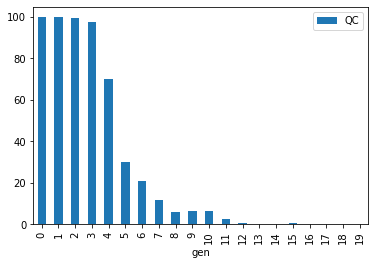

Only looking at 87994 QC branch points rather than 464869 (18.93%)


In [5]:
# procedded df with branch mode classification
total_df = pd.read_csv("per_branch_pt_mode_classification_3_modes.csv")

qc_df = total_df.merge(branch_pt_df, on=['idno', 'startbpid'], how='left')
print(len(qc_df), len(total_df))
# Print what % of each generation is in the QC df
percents = qc_df.groupby([pd.Grouper('gen')]).agg({'QC': lambda x:100*sum(x)/len(x)})
display(percents)
percents.plot.bar()
plt.show()


QC=True
if QC:
    print(f'Only looking at {qc_df.QC.sum()} QC branch points rather than {len(total_df)} ({100*(qc_df.QC.sum()/len(total_df)):.2f}%)')
    total_df = qc_df.loc[qc_df.QC]
else:
    print(f'Using full df, {len(total_df)}')

In [6]:
total_df['angle']=total_df.angle.str.strip('[]').str.split(',')
total_df['centerlinelength']=total_df.centerlinelength.str.strip('[]').str.split(',')
total_df['lobe'] = total_df.lobe.str.strip("[]").str.split(",")
# total_df['weibel_generation'] = total_df.lobe.str.strip("[]").str.split(",")

/tmp/ipykernel_32135/4193791633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['angle']=total_df.angle.str.strip('[]').str.split(',')
/tmp/ipykernel_32135/4193791633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['centerlinelength']=total_df.centerlinelength.str.strip('[]').str.split(',')
/tmp/ipykernel_32135/4193791633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

<AxesSubplot:>

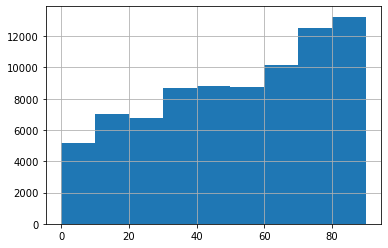

In [7]:
total_df.plane_rotation.hist(bins=9)

/tmp/ipykernel_32135/1309390408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['angle_ratio']=total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x)/max(x) if max(x)>0 else np.nan)


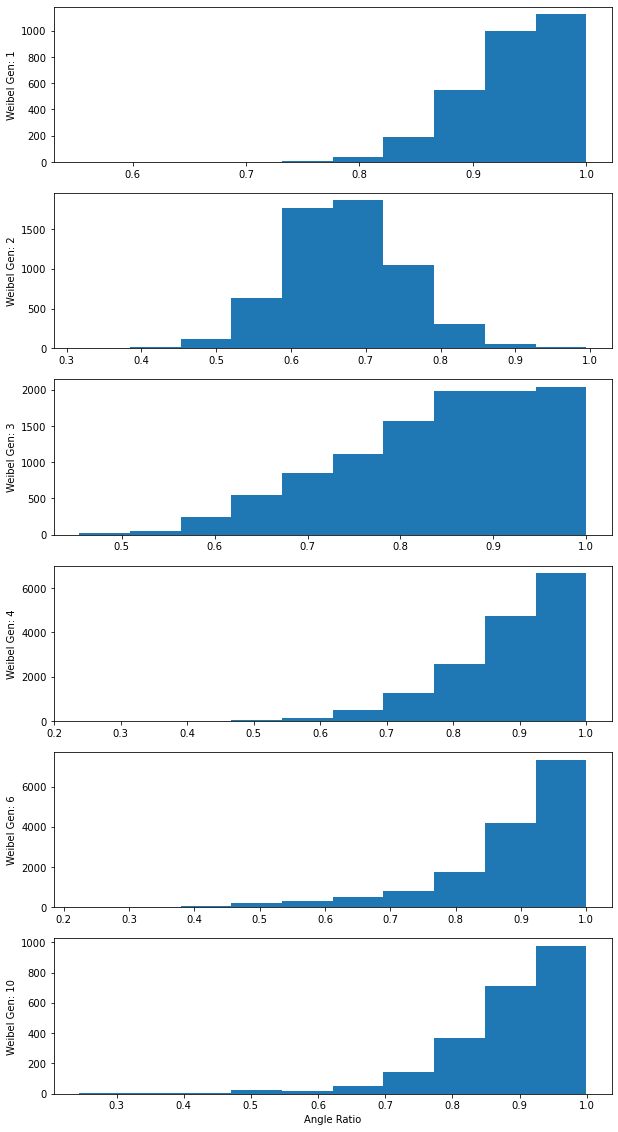

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
# Angle Ratios
# angle_ratio = total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x)/max(x) if len(x)==2 else np.nan)
# total_df['angle']=total_df.angle.str.strip('[]').str.split(',')
total_df['angle_ratio']=total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x)/max(x) if max(x)>0 else np.nan)
gens_to_show = [1,2,3,4,6,10]
f, axes = plt.subplots(len(gens_to_show),1, figsize=(10,20))
i=0
for gen in gens_to_show:
    total_df.loc[total_df.gen.astype(float)==gen]['angle_ratio'].hist(ax=axes[i], grid=False)
    axes[i].set_ylabel(f'Weibel Gen: {gen}')
    i+=1
axes[-1].set_xlabel('Angle Ratio')
plt.savefig('angle_ratio_gen_subplots.png')
plt.show()

plt.figure()
# total_df.groupby('gen').agg({'angle_ratio':lambda x:x.hist()})

In [9]:
total_df['min_angle']=total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x))
total_df['max_angle'] = total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:max(x))
# limiting generations + removing trachea
plot_df = total_df.loc[(~(total_df.startbpid.astype(float)==-1))&(total_df.gen <=10) &(total_df.gen >1) &(total_df.startbpid != -1)]


/tmp/ipykernel_32135/45069460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['min_angle']=total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x))
/tmp/ipykernel_32135/45069460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['max_angle'] = total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:max(x))


In [10]:
# the zeros here are some from short segments (connectors) + some from longer --> could be error or correct --> only 23 segments so leaving in

total_df['min_centerline'] = total_df.centerlinelength.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x))
total_df.loc[(total_df.min_angle == 0) & (total_df.startbpid != -1)].sort_values(by='min_centerline')

/tmp/ipykernel_32135/2236831702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['min_centerline'] = total_df.centerlinelength.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x))


,idno,startbpid,anatomicalname,centerlinelength,avginnerarea,lobe,sublobe,endbpid,angle,dircosx,...,other_mode?,planar_bi,orthog_bi,other_bi,gen,QC,angle_ratio,min_angle,max_angle,min_centerline


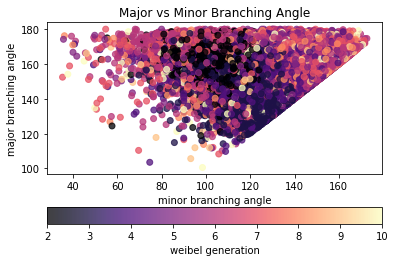

In [11]:
plt.figure()
plt.scatter(plot_df.min_angle, plot_df.max_angle, c=plot_df.gen,cmap='magma', alpha=0.75)
plt.colorbar(label="weibel generation", orientation="horizontal")
plt.xlabel("minor branching angle")
plt.ylabel("major branching angle")
plt.title('Major vs Minor Branching Angle')
plt.savefig('major_vs_minor_branching_angle.png')
plt.show()

In [12]:
colours = {
    'Domain Branching':'#428bca', 
    'Planar Bifurcation (0-30)':'#5cb85c',
    'Orthogonal Bifucation (60-90)':'#d9534f',
    'Intermediate Bifucation (30 < x <60)':'#ffad60',
    'Other Branching Mode (Not B/D)':'#d896ff'
}
renaming = {"domain?":"Domain Branching",
    "bifurcation?": "Bifurcation",
        "other_mode?":"Other Branching Mode (Not B/D)",
            "planar_bi": "Planar Bifurcation (0-30)",
                "orthog_bi":"Orthogonal Bifucation (60-90)",
                    "other_bi": "Intermediate Bifucation (30 < x <60)"}

/tmp/ipykernel_32135/2170110877.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df.rename(columns=renaming, inplace=True)
/tmp/ipykernel_32135/2170110877.py:28: FutureWarning: ['anatomicalname', 'centerlinelength', 'avginnerarea', 'sublobe', 'endbpid', 'angle', 'dircosx', 'dircosy', 'dircosz', 'weibel_generation', 'thetax_', 'thetaz_', 'thetay_', 'v_', 'plane_v', 'parent_plane_v'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = w_lobes.groupby('lobe').agg(lambda x: 100*(sum(x)/len(x)))


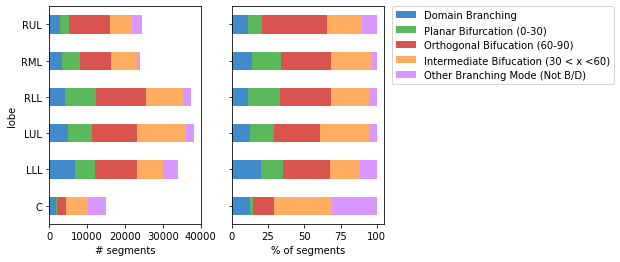

In [13]:
f, (ax1, ax2) = plt.subplots(1,2)

# colours = {
#     'Domain Branching':'#428bca', 
#     'Planar Bifurcation (0-20)':'#5cb85c',
#     'Orthogonal Bifucation (70-90)':'#d9534f',
#     'Other Bifucation (20 < x <70)':'#ffad60',
#     'Other Branching Mode (Not B/D)':'#d896ff'
# }
# renaming = {"domain?":"Domain Branching",
#     "bifurcation?": "Bifurcation",
#         "other_mode?":"Other Branching Mode (Not B/D)",
#             "planar_bi": "Planar Bifurcation (0-20)",
#                 "orthog_bi":"Orthogonal Bifucation (70-90)",
#                     "other_bi": "Other Bifucation (20 < x <70)"}




total_df.rename(columns=renaming, inplace=True)


renaming_lobes = {0:'C', 1:'LUL', 2:'LLL', 3: 'RUL', 4: 'RML', 5:'RLL'}

w_lobes= total_df.explode('lobe')
w_lobes['lobe'] = w_lobes['lobe'].apply(lambda x:float(x)).apply(lambda x:renaming_lobes[x])
w_lobes.groupby('lobe').agg(sum)[['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)']].plot.barh(stacked=True, ax=ax1, color=colours, legend=None)
grouped = w_lobes.groupby('lobe').agg(lambda x: 100*(sum(x)/len(x)))
grouped[['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)']].plot.barh(stacked=True, ax=ax2, legend=None, sharey=True, color=colours)
ax1.set_xlabel('# segments')
ax2.set_xlabel('% of segments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('mode_propotions_3_lobes_qc.jpg', bbox_inches="tight")
plt.show()

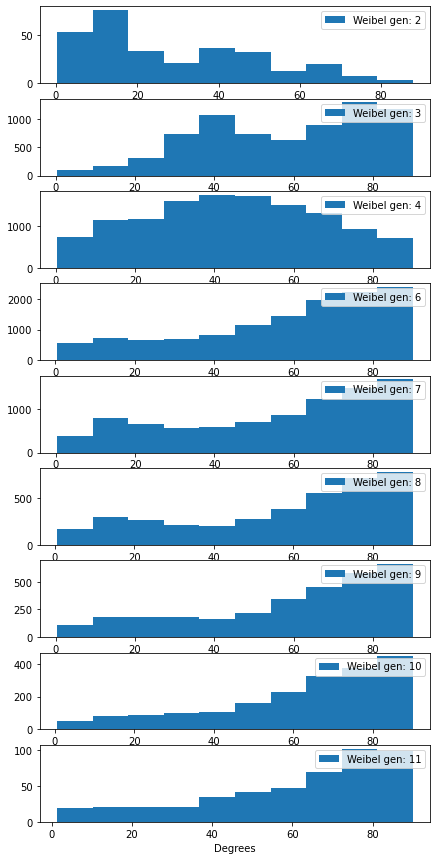

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
df_rotation = total_df.copy()

i=0
gens_to_show = [2,3,4, 6, 7, 8,9,  10, 11]
f, axes = plt.subplots(len(gens_to_show),1, figsize=(7,15))
for gen in gens_to_show:
    df_rotation.loc[(df_rotation.gen.astype(float)==gen) & (df_rotation['Bifurcation'])]['plane_rotation'].hist(ax=axes[i], grid=False, label=f'Weibel gen: {gen}')
#     axes[i].set_ylabel(f'Frequency Count')
    axes[i].legend(loc='upper right')
    i+=1
axes[-1].set_xlabel(f'Degrees')  
plt.savefig('plane_rotation_w_subplots_all.png')
plt.show()

plt.figure()

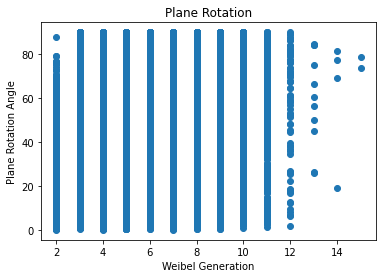

In [15]:
plt.figure()
plot_df = total_df.dropna(subset=['plane_rotation'])
plt.scatter(plot_df.gen, plot_df.plane_rotation)
# plt.colorbar(label="weibel generation", orientation="horizontal")
plt.xlabel("Weibel Generation")
plt.ylabel("Plane Rotation Angle")
plt.title('Plane Rotation')
plt.show()

In [16]:
total_df.columns
# 100*(total_df[['bifurcation?', 'domain?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].sum()/len(total_df)).round(2)

Index(['idno', 'startbpid', 'anatomicalname', 'centerlinelength',
       'avginnerarea', 'lobe', 'sublobe', 'endbpid', 'angle', 'dircosx',
       'dircosy', 'dircosz', 'weibel_generation', 'thetax_', 'thetaz_',
       'thetay_', 'v_', 'plane_v', 'parent_plane_v', 'plane_rotation',
       'Domain Branching', 'Bifurcation', 'Other Branching Mode (Not B/D)',
       'Planar Bifurcation (0-30)', 'Orthogonal Bifucation (60-90)',
       'Intermediate Bifucation (30 < x <60)', 'gen', 'QC', 'angle_ratio',
       'min_angle', 'max_angle', 'min_centerline'],
      dtype='object')

,gen,Domain Branching,Bifurcation,Other Branching Mode (Not B/D),Planar Bifurcation (0-30),Orthogonal Bifucation (60-90),Intermediate Bifucation (30 < x <60),endbpid
0,0,0,0,2907,0,0,0,2907
1,1,10,2882,16,0,0,2882,2908
2,2,3308,301,2195,172,35,94,5804
3,3,1545,7100,1757,724,3590,2786,10402
4,4,1566,13205,1198,3527,3476,6202,15969
5,5,1259,11839,287,3173,4348,4318,13385
6,6,2101,12710,449,2158,7118,3434,15260
7,7,1018,8981,277,2001,4735,2245,10276
8,8,519,3879,129,779,2212,888,4527
9,9,402,3080,125,532,1839,709,3607


/tmp/ipykernel_32135/288898393.py:31: FutureWarning: ['anatomicalname', 'centerlinelength', 'avginnerarea', 'lobe', 'sublobe', 'endbpid', 'angle', 'dircosx', 'dircosy', 'dircosz', 'weibel_generation', 'thetax_', 'thetaz_', 'thetay_', 'v_', 'plane_v', 'parent_plane_v'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = total_df.groupby('gen').agg(lambda x: 100*sum(x)/len(x))


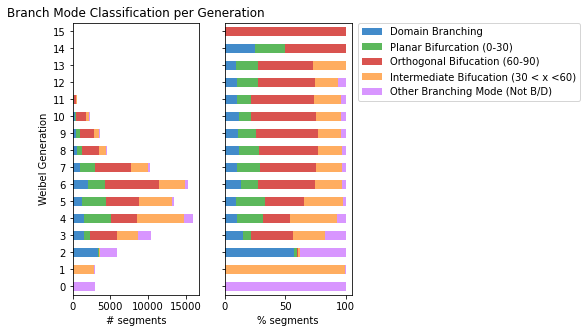

In [17]:


categories = total_df.groupby('gen').agg({
    'Domain Branching': sum,
    'Bifurcation': sum,
    'Other Branching Mode (Not B/D)':sum,
    'Planar Bifurcation (0-30)': sum,
    'Orthogonal Bifucation (60-90)': sum,
    'Intermediate Bifucation (30 < x <60)':sum,
    'endbpid': "count"
}).reset_index()

# renaming = {"domain?":"Domain Branching",
#     "bifurcation?": "Bifurcation",
#         "other_mode?":"Other Branching Mode (Not B/D)",
#             "planar_bi": "Planar Bifurcation (0-20)",
#                 "orthog_bi":"Orthogonal Bifucation (70-90)",
#                     "other_bi": "Other Bifucation (20 < x <70)"}
categories.rename(columns=renaming, inplace=True)
# w_lobes.groupby('lobe').agg(sum)[['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)']].plot.barh(stacked=True, ax=ax1, color=colours, legend=None)
# grouped = w_lobes.groupby('lobe').agg(lambda x: 100*(sum(x)/len(x)))
# grouped[['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)']].plot.barh(stacked=True, ax=ax2, legend=None, sharey=True, color=colours)
# ax1.set_xlabel('# segments')
# ax2.set_xlabel('% of segments')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
display(categories)
f, (ax1, ax2) = plt.subplots(1,2)
ax1.set_yticks(np.arange(0, 20, 1))
categories.plot.barh(x='gen', y=['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)'],color=colours, stacked=True, ax=ax1,grid=False, figsize=(5,5), legend=None)
ax1.set_title("Branch Mode Classification per Generation")
ax1.set_ylabel("Weibel Generation")
ax1.set_xlabel("# segments")
grouped = total_df.groupby('gen').agg(lambda x: 100*sum(x)/len(x))
grouped[['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)']].plot.barh(stacked=True, ax=ax2, legend=None, sharey=True, color=colours, figsize=(5,5), grid=False)
ax2.set_xlabel("% segments")


ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("branch_modes_per_gen_qc_w_percent.jpg", bbox_inches="tight")
plt.show()

## Patterns

In [18]:
variables = ['Domain Branching', 'Other Branching Mode (Not B/D)',
       'Planar Bifurcation (0-30)', 'Orthogonal Bifucation (60-90)',
       'Intermediate Bifucation (30 < x <60)']
print(orig_df.columns, total_df.columns)
single_test = total_df.loc[total_df.idno == 3010007]
single_test['category']=single_test[variables].apply(lambda x:variables[np.argmax(x)], axis=1)
w_category = orig_df[['idno', 'anatomicalname','startbpid', 'endbpid','angle']].merge(single_test[['idno', 'startbpid', 'category']], on=['idno','startbpid'], how='right')

w_category

Index(['idno', 'anatomicalname', 'centerlinelength', 'avginnerarea', 'lobe',
       'sublobe', 'endbpid', 'startbpid', 'angle', 'dircosx', 'dircosy',
       'dircosz', 'weibel_generation', 'QC'],
      dtype='object') Index(['idno', 'startbpid', 'anatomicalname', 'centerlinelength',
       'avginnerarea', 'lobe', 'sublobe', 'endbpid', 'angle', 'dircosx',
       'dircosy', 'dircosz', 'weibel_generation', 'thetax_', 'thetaz_',
       'thetay_', 'v_', 'plane_v', 'parent_plane_v', 'plane_rotation',
       'Domain Branching', 'Bifurcation', 'Other Branching Mode (Not B/D)',
       'Planar Bifurcation (0-30)', 'Orthogonal Bifucation (60-90)',
       'Intermediate Bifucation (30 < x <60)', 'gen', 'QC', 'angle_ratio',
       'min_angle', 'max_angle', 'min_centerline'],
      dtype='object')


/tmp/ipykernel_32135/779546225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_test['category']=single_test[variables].apply(lambda x:variables[np.argmax(x)], axis=1)


,idno,anatomicalname,startbpid,endbpid,angle,category
0,3010007,Trachea,-1.0,1.0,NaN,Other Branching Mode (Not B/D)
1,3010007,LMB,1.0,3.0,140.0360,Intermediate Bifucation (30 < x <60)
2,3010007,RMB,1.0,2.0,134.8050,Intermediate Bifucation (30 < x <60)
3,3010007,BronInt,2.0,4.0,160.3120,Domain Branching
4,3010007,RUL,2.0,5.0,98.5825,Domain Branching
...,...,...,...,...,...,...
62,3010007,-,115.0,193.0,169.7410,Orthogonal Bifucation (60-90)
63,3010007,-,160.0,227.0,144.0630,Intermediate Bifucation (30 < x <60)
64,3010007,-,160.0,226.0,155.2000,Intermediate Bifucation (30 < x <60)
65,3010007,-,161.0,229.0,152.8770,Intermediate Bifucation (30 < x <60)


[(-1.0, {'category': None, 'anatomicalname': None}), (1.0, {'category': 'Other Branching Mode (Not B/D)', 'anatomicalname': 'Trachea'}), (3.0, {'category': 'Intermediate Bifucation (30 < x <60)', 'anatomicalname': 'LMB'}), (2.0, {'category': 'Intermediate Bifucation (30 < x <60)', 'anatomicalname': 'RMB'}), (4.0, {'category': 'Domain Branching', 'anatomicalname': 'BronInt'}), (5.0, {'category': 'Domain Branching', 'anatomicalname': 'RUL'}), (6.0, {'category': 'Domain Branching', 'anatomicalname': 'LLB6'}), (7.0, {'category': 'Domain Branching', 'anatomicalname': 'LUL'}), (9.0, {'category': 'Domain Branching', 'anatomicalname': 'RB4+5'}), (8.0, {'category': 'Domain Branching', 'anatomicalname': '-'}), (10.0, {'category': 'Planar Bifurcation (0-30)', 'anatomicalname': 'RB1'}), (11.0, {'category': 'Planar Bifurcation (0-30)', 'anatomicalname': '-'}), (13.0, {'category': 'Other Branching Mode (Not B/D)', 'anatomicalname': 'LB6'}), (12.0, {'category': 'Other Branching Mode (Not B/D)', 'anat

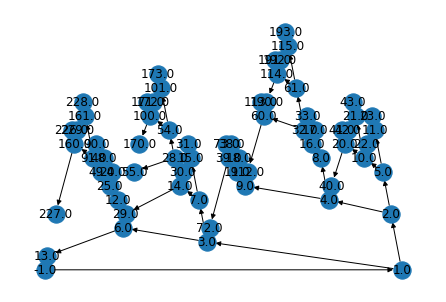

In [19]:
# nodes and features

nodes = list(zip(w_category.endbpid, w_category[['category', 'anatomicalname']].to_dict(orient='records')))
nodes =[(-1.0,
  {'category': None,
  'anatomicalname':None})]+nodes
# nodes = [-1]+w_category.endbpid.to_list()

# edges and features: TODO include all features relevant + NORMALISE
edges = list(zip(w_category.startbpid, w_category.endbpid))
# edges_with_features = dict(zip(edges,single_test[['centerlinelength', 'avginnerarea']].to_dict(orient='records')))
# edges_with_features

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
# nx.set_edge_attributes(g,edges_with_features)
# print(g.edges(data=True))
print(g.nodes(data=True))
# 2D projection of tree (excluding the trachea itself)
nx.draw_planar(g,with_labels=True)

# for path in nx.shortest_path(g, source=-1, target=228):
lobar_paths = w_category.loc[w_category.anatomicalname.isin(['RUL', 'RLL', 'RML', 'LUL', 'LLL'])]
print(w_category.columns)    
leaves = w_category.loc[~w_category.endbpid.isin(w_category.startbpid.unique())].endbpid.to_list()
for leaf in leaves:
    path = nx.shortest_path(g, source=-1, target=leaf)

    print([g.nodes[node]['anatomicalname'] for node in path])